In [240]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_table("D:/all-pics-fractal-info/boxcountsummary.txt")
patient_names,scan_names,slice_names = [],[],[]
print(df.shape[0])
for i in range(0,df.shape[0]):
    img_name = df[df.columns[0]][i][:df[df.columns[0]][i].rfind("png")]
    patient_names.append(img_name[:img_name.find("_")])
    scan_names.append(img_name[img_name.find("_")+1:img_name.rfind("_")])
    slice_names.append(img_name[img_name.rfind("_")+1:])
    
    

df.loc[:,"patient_name"] = pd.Series(patient_names)
df.loc[:,"scan_name"] = pd.Series(scan_names)
df.loc[:,"slice_name"] = pd.Series(slice_names)
df1 = df[["patient_name","scan_name","slice_name",df.columns[5],df.columns[6],df.columns[86]]]
df1.columns = ["patient_name","scan_name","slice_name","frac_dim","sigma_frac_dim","lacunarity"]
df1.head()


7447


,patient_name,scan_name,slice_name,frac_dim,sigma_frac_dim,lacunarity
0,NSCLC1,scan2,slice0,1.8992,0.0,0.0
1,NSCLC1,scan2,slice1,1.8992,0.0,0.0
2,NSCLC1,scan2,slice10,1.8992,0.0,0.0
3,NSCLC1,scan2,slice100,1.8992,0.0,0.0
4,NSCLC1,scan2,slice101,1.8992,0.0,0.0


In [ ]:
df1.head()
patient_names = list(set(df1[df1.columns[0]].values))
for patient in patient_names:
    patient_df = df1.where(df1["patient_name"] == patient)
    patient_df.dropna(inplace = True)
    scan_names = list(set(patient_df[patient_df.columns[1]].values))
    scan_mean_lac = []
    for scan in scan_names:
        scan_df = patient_df.where(patient_df["scan_name"] == scan)
        scan_df.dropna(inplace= True)
        scan_mean_lac.append(scan_df["lacunarity"].where(scan_df["lacunarity"] != 0).max())
    for i in scan_mean

In [203]:
import numpy as np
scanfile = open("D:/allCSV/scantimes.csv")
scan_times = {}
while True:
    line = scanfile.readline()
    if line == "":
        break
    arr = line.split(",")
    name = arr[0]
    times = arr[1:]
    times = np.array(times)
    times = times[times != ""]
    times = times[times != "\n"].astype(int)
    if name[0] == "N":
        name = "NSCLC" + str(int(name[1:]))
    if name[0] == "S":
        name = "SABR" + str(int(name[1:]))
        
    if name == "SABR5":
        times = times[:-1]
        
    scan_times[name] = times
print(scan_times)

{'SABR5': array([0, 2, 6, 8]), 'SABR2': array([0, 2, 4]), 'NSCLC16': array([ 0,  5,  6, 13, 15]), 'NSCLC10': array([ 0,  7, 11, 18]), 'NSCLC6': array([ 0,  5, 13, 19, 26]), 'NSCLC1': array([ 0,  2,  9, 16, 17, 22]), 'T12': array([ 0,  6, 12, 18, 20, 26, 32, 38, 46]), 'SABR8': array([ 0,  2,  4,  8, 10]), 'SABR10': array([0, 2, 6]), 'T01': array([ 0,  2,  4,  8, 10]), 'SABR9': array([ 0,  2,  4,  8, 10, 14, 16, 18]), 'SABR3': array([ 0,  2,  4,  8, 10]), 'T03': array([ 0,  2,  6,  8, 10]), 'T09': array([ 0,  2,  4,  8, 11, 14, 16, 18, 23]), 'SABR4': array([ 0,  4,  6,  8, 12]), 'NSCLC11': array([ 0,  7, 14, 21]), 'T10': array([ 0,  4,  6, 10, 12, 14, 18, 20]), 'T04': array([ 0,  4,  6, 10, 12, 14, 18]), 'SABR1': array([ 0,  2,  6,  8, 10]), 'SABR7': array([ 0,  2,  6,  8, 10]), 'T06': array([0, 4, 6]), 'T08': array([ 0,  4,  6, 10, 12]), 'NSCLC7': array([ 0,  4, 11, 18, 25, 32, 35]), 'T11': array([ 0,  2,  6,  8, 10, 14, 16, 20]), 'T05': array([ 0,  2,  6,  8, 12]), 'NSCLC2': array([ 0,

scan2
SABR4 scan2 [1.0245230769230769]
scan5
SABR4 scan5 [1.0245230769230769, 1.0142923076923078]
scan3
SABR4 scan3 [1.0245230769230769, 1.0142923076923078, 1.0116538461538462]
scan4
SABR4 scan4 [1.0245230769230769, 1.0142923076923078, 1.0116538461538462, 1.0216923076923077]
scan6
SABR4 scan6 [1.0245230769230769, 1.0142923076923078, 1.0116538461538462, 1.0216923076923077, 1.012169230769231]
scan2
SABR1 scan2 [1.0103833333333332]
scan5
SABR1 scan5 [1.0103833333333332, 1.0116233333333333]
scan3
SABR1 scan3 [1.0103833333333332, 1.0116233333333333, 1.0159133333333334]
scan4
SABR1 scan4 [1.0103833333333332, 1.0116233333333333, 1.0159133333333334, 1.0150299999999999]
scan6
SABR1 scan6 [1.0103833333333332, 1.0116233333333333, 1.0159133333333334, 1.0150299999999999, 1.0018066666666667]
scan2
SABR5 scan2 [0.9784175000000002]
scan5
SABR5 scan5 [0.9784175000000002, 0.9746499999999999]
scan3
SABR5 scan3 [0.9784175000000002, 0.9746499999999999, 0.9688525]
scan4
SABR5 scan4 [0.9784175000000002, 0.97

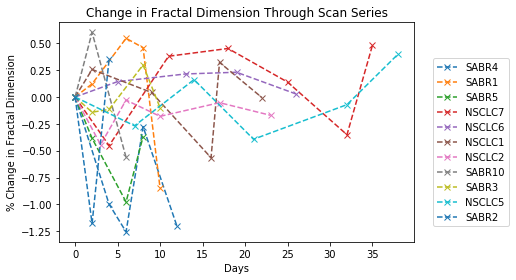

In [241]:
df1.head()
fig, ax = plt.subplots()
ax.set_xlabel("Days")
ax.set_ylabel("% Change in Fractal Dimension")
ax.set_title("Change in Fractal Dimension Through Scan Series")
patient_names = list(set(df1[df1.columns[0]].values))
for patient in patient_names:
    patient_df = df1.where(df1["patient_name"] == patient)
    patient_df.dropna(inplace = True)
    scan_names = list(set(patient_df[patient_df.columns[1]].values))
    scan_mean_lac = []
    scan_mean_frac_dim = []
    for scan in scan_names:
        scan_df = patient_df.where(patient_df["scan_name"] == scan)
        scan_df.dropna(inplace= True)
        print(scan)
        scan_mean_frac_dim.append(scan_df["frac_dim"].where(scan_df["frac_dim"] != 1.8992 ).mean())
        print(patient,scan,scan_mean_frac_dim)
        scan_mean_lac.append(scan_df["lacunarity"].where(scan_df["lacunarity"] != 0).mean())
    scan_lac_arr = (scan_mean_lac/scan_mean_lac[0] -1)*100
    scan_fracdim_arr = (scan_mean_frac_dim/scan_mean_frac_dim[0] - 1) *100
    ax.plot(scan_times[patient],scan_fracdim_arr,marker = "x",linestyle = "dashed",label = patient)

lgd= plt.legend(bbox_to_anchor=(1,0.8),
           bbox_transform=plt.gcf().transFigure)
plt.tight_layout()
plt.savefig("D:/Interesting pictures/changeinfractaldimension.png",transparent = False,bbox_extra_artists=(lgd,), bbox_inches='tight')
    

In [ ]:
fig,ax = plt.subplots(1)
array = []
for file in count_files:
    df = pd.read_table(os.path.join(the_path,file))
    mode = df[df.columns[5]].mode()[0]
    array.append(df.where(df[df.columns[5]] < mode)[df.columns[5]].mean())
    #plt.savefig(os.path.join(the_path, file.replace("txt","png") ))
print(array)
plt.scatter([2,3,4,5,6,7],array)
#ax.set_ylim([0.0154,0.0162])
plt.xlabel("Scan Number")
plt.ylabel("Mean Fractal Dimension")
plt.title("Mean Fractal Dimension across Scan Series (NSCLC1)")
plt.tight_layout()
plt.savefig("D:/Interesting pictures/MeanFractalDimension.png")